In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ruta del archivo a convertir
archivo_log = "./20250929-enroll.log"

In [3]:
# Crear el dataframe con pandas
df = pd.read_json(archivo_log, lines=True)
df.head(1000).to_csv("sample.csv", index=False)

In [4]:
# Convertir el dataframe a un archivo .csv
df.to_csv("20250929-enroll.csv",index=False, encoding="utf-8")
print(df.head)

<bound method NDFrame.head of                          tiempo  estado metodo  \
0       2025-09-29 15:17:03.033     201   POST   
1       2025-09-29 15:17:03.112     201   POST   
2       2025-09-29 15:17:03.177     201   POST   
3       2025-09-29 15:17:03.235     201   POST   
4       2025-09-29 15:17:03.249     201   POST   
...                         ...     ...    ...   
999995  2025-09-29 20:42:00.117     201   POST   
999996  2025-09-29 20:42:00.153     201   POST   
999997  2025-09-29 20:42:00.163     201   POST   
999998  2025-09-29 20:42:00.169     201   POST   
999999  2025-09-29 20:42:00.175     201   POST   

                                                   pedido           server  \
0       /L9h/v3/envases/grupo1/nombres/0000030b0dc3b26...  L9h/25.9.pre.17   
1       /L9h/v3/envases/grupo1/nombres/000001d0b47bfe4...  L9h/25.9.pre.17   
2       /L9h/v3/envases/grupo1/nombres/0000015883985e9...  L9h/25.9.pre.17   
3       /L9h/v3/envases/grupo1/nombres/000002315c4ee98...

In [5]:
# Ver columnas numéricas
print(df.dtypes)

tiempo      object
estado       int64
metodo      object
pedido      object
server      object
baliza      object
acceso      object
fuentes     object
decode     float64
detect     float64
refine     float64
assess       int64
vector     float64
search       int64
verify       int64
commit     float64
entire     float64
rostros     object
envase      object
nombre      object
dtype: object


In [6]:
# Columnas numéricas importantes para analizarse en estadística
columnas_numericas = ["decode", "detect", "refine", "assess", "commit", "entire", "vector", "search", "verify"]

In [7]:
#Calcular estadística
df_numericas = df[columnas_numericas]
media = df_numericas.mean()
desviacion_estandar = df_numericas.std()
varianza = df_numericas.var()
mediana = df_numericas.median()
moda = df_numericas.mode().iloc[0]
curtosis = df_numericas.kurtosis()
sesgo = df_numericas.skew()

In [8]:
# Dataframe de estadísticas
estadisticas = pd.DataFrame({
    "Media": media,
    "Desv_estándar": desviacion_estandar,
    "Varianza": varianza,
    "Mediana": mediana,
    "Moda": moda,
    "Curtosis": curtosis,
    "Sesgo": sesgo
})

print(estadisticas)

            Media  Desv_estándar     Varianza  Mediana    Moda     Curtosis  \
decode   1.446256       2.250444     5.064499    1.277   1.090   580.594455   
detect  14.637524       8.809122    77.600638   12.756   3.466     3.256254   
refine   1.259194       1.058517     1.120459    0.947   0.000  1108.919302   
assess   0.000000       0.000000     0.000000    0.000   0.000     0.000000   
commit  50.259868      66.193784  4381.617009    4.721   4.181    -0.819282   
entire  89.010781      72.426508  5245.599028   49.214  38.847    -0.869164   
vector  21.345362       9.208229    84.791477   21.281   0.000     2.598465   
search   0.000000       0.000000     0.000000    0.000   0.000     0.000000   
verify   0.000000       0.000000     0.000000    0.000   0.000     0.000000   

            Sesgo  
decode  23.030035  
detect   1.271743  
refine   8.275066  
assess   0.000000  
commit   0.918728  
entire   0.840280  
vector   0.649639  
search   0.000000  
verify   0.000000  


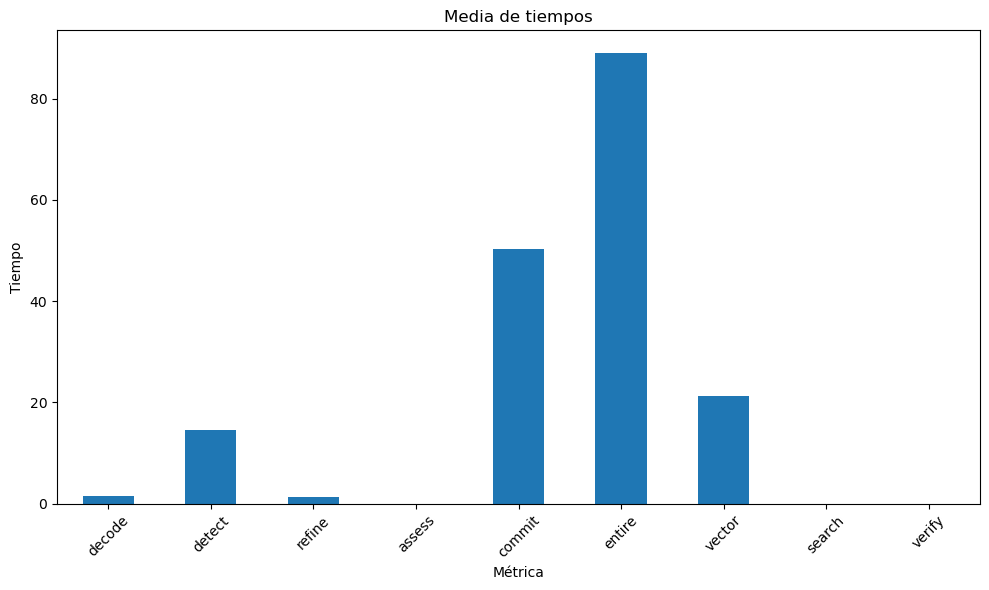

In [9]:
# Gráfica de barras (medias)
plt.figure(figsize=(10,6))
media.plot(kind="bar")
plt.title("Media de tiempos")
plt.ylabel("Tiempo")
plt.xlabel("Métrica")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

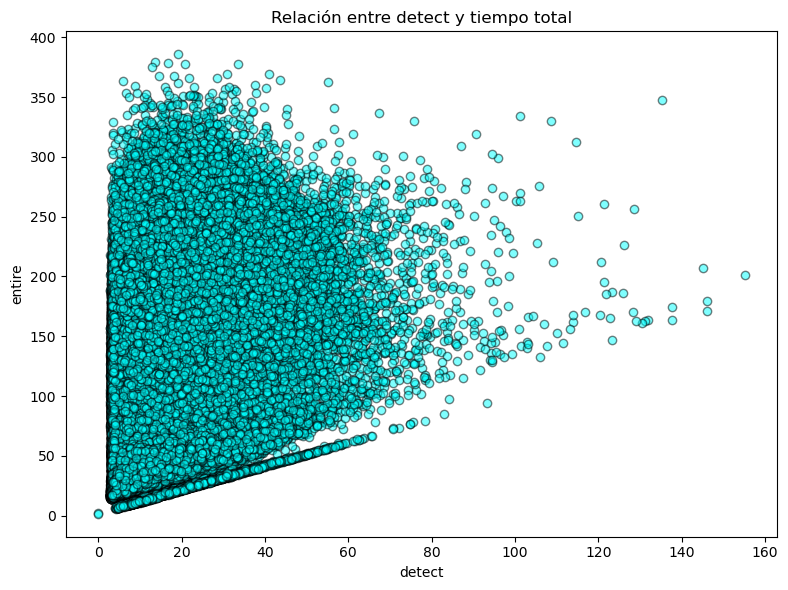

In [10]:
# Gráfica de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df["detect"], df["entire"], alpha=0.5, color = "cyan", edgecolors = "black")
plt.xlabel("detect")
plt.ylabel("entire")
plt.title("Relación entre detect y tiempo total")
plt.tight_layout()
plt.show()

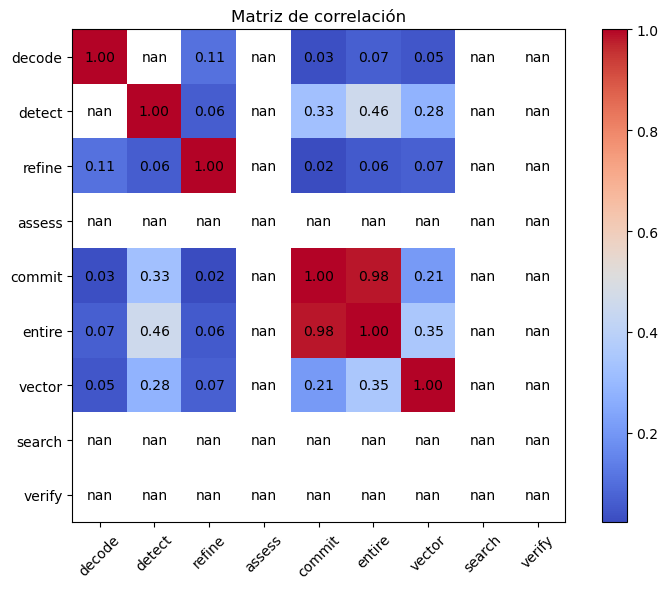

In [11]:
# Matriz de correlación

# Calcular matriz de correlación
corr = df_numericas.corr()

# Filtrar solo correlaciones mayores que 0
corr = corr[corr > 0]

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()

plt.xticks(range(len(columnas_numericas)), columnas_numericas, rotation=45)
plt.yticks(range(len(columnas_numericas)), columnas_numericas)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        valor = corr.iloc[i, j]
        if valor != 0:
            plt.text(j, i, f"{valor:.2f}",
                     ha="center", va="center")
            
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


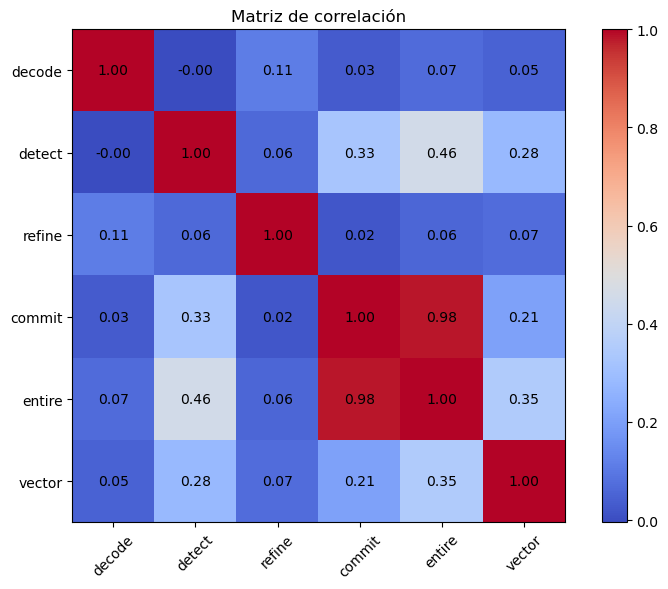

In [12]:
# Matriz de correlación limpia
corr = df_numericas.corr()

# Crear copia sin diagonal para evaluar correlaciones reales
corr_sin_diag = corr.copy()
np.fill_diagonal(corr_sin_diag.values, 0)

# Solo con columnas que tengan alguna correlación distinta de 0
cols_validas = corr_sin_diag.columns[(corr_sin_diag.abs() > 0).any()]

# Filtrar matriz
corr = corr.loc[cols_validas, cols_validas]

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

# Escribir solo valores distintos de 0
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if corr.iloc[i, j] != 0:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                     ha="center", va="center")

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()